In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# 1. 데이터 및 라이브러리 불러오기
----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from imblearn.over_sampling import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.combine import *

---
- 컬럼명 영문으로 변환
---

- 매출액 = sales
- 자산총계 = TA
- 영업이익 = OP
- 당기순이익 = NI
- 기업할당지수 = CAI
- 매출액 성장률 = TGR
- 매출 성장률 = AGR
- 총자산 성장률 = TAGR
- 존속기간 = duration

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Numble_Challenge/data/dataset_정제_후.csv')
del data['Unnamed: 0'], data['사업자번호']
data.columns = ['year','target','kospi_sum_close','kospi_mean_close','kospi_mean_change','kosdaq_sum_close','kosdaq_mean_close','kosdaq_mean_change','sales','TA','OP','NI','CAI','SGR','TGR','TAGR','duration']
data = data[['year','kospi_sum_close','kospi_mean_close','kospi_mean_change','kosdaq_sum_close','kosdaq_mean_close','kosdaq_mean_change','sales','TA','OP','NI','CAI','SGR','TGR','TAGR','duration','target']]
data

,year,kospi_sum_close,kospi_mean_close,kospi_mean_change,kosdaq_sum_close,kosdaq_mean_close,kosdaq_mean_change,sales,TA,OP,NI,CAI,SGR,TGR,TAGR,duration,target
0,2019,2.873155e+08,20446.593937,-0.000105,2.605542e+07,3993.780196,0.000445,6541583.0,36320470.0,843072.0,2733421.0,0.012519,-1.33,-1.326,3.731,0.0,0
1,2020,2.470454e+08,16303.400977,0.000400,2.994878e+07,3617.876299,0.001440,5933317.0,40601940.0,68146.0,3406757.0,0.009986,-5.40,-9.298,11.788,0.0,0
2,2021,3.343307e+08,19855.725680,0.001174,5.422458e+07,4547.897761,0.001125,6158586.0,38310842.0,387000.0,3823473.0,0.008187,-2.43,3.797,-5.643,0.0,0
3,2019,1.003511e+09,71566.878191,0.000020,1.505344e+08,14398.318317,0.000432,1150528.0,21376102.0,239972.0,11534.0,0.017053,2.08,2.079,2.808,0.0,0
4,2020,8.743153e+08,61706.208272,0.000761,1.385269e+08,12184.615973,0.001187,662177.0,21548434.0,-665914.0,-717899.0,0.018388,-23.35,-42.446,0.806,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66064,2020,6.018734e+08,36986.011983,0.001615,1.250373e+09,10145.261118,0.001819,24980062.0,29223901.0,-810985.0,-247235.0,0.069473,-9.93,-49.970,-19.279,2.0,0
66065,2021,9.182064e+08,54596.644072,0.000916,1.923732e+09,14587.649317,0.000844,25680342.0,27021362.0,930018.0,922054.0,0.059379,-5.87,2.803,-7.537,2.0,0
66066,2019,9.142384e+08,22062.270325,0.000068,3.274347e+08,7686.080491,0.000350,15869364.0,13176486.0,995588.0,579237.0,0.004317,66.02,66.018,26.062,4.0,0
66067,2020,8.304181e+08,19474.181582,0.001118,3.213642e+08,7231.906857,0.001332,18863062.0,15145761.0,1272377.0,535114.0,0.005525,40.48,18.865,14.945,4.0,0


---
- inf 값 수정
---

In [4]:
data['SGR'] = data['SGR'].replace(np.inf, 0)

---
- data 분리
---

In [5]:
data_y = data['target']
data_x = data.drop(['target'], axis = 1)
print(data_x.shape)
print(data_y.shape)

(66069, 16)
(66069,)


---
# 2. 데이터 전처리
----

---
### 2-1. imblearn 모듈을 통한 불균형 데이터 처리 비교
----

|불균형 처리 종류|Test 정확도|
|---|----|
|RandomOverSampler|0.704|
|ADASYN|0.642|
|SMOTE|0.717|
|SMOTE + ENN|0.742|
|SMOTE + Tomek|0.716|

---
##### 2-1-1. RandomOverSampler
----

In [6]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
oversampler = RandomOverSampler(random_state=42)
data_x , data_y = oversampler.fit_resample(data_x, data_y)

# 데이터 정규화
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [7]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.705
test 정확도: 0.704
데이터 개수 : 127500


---
##### 2-1-2. ADASYN
----

In [8]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
adasyn = ADASYN(random_state=42)
data_x , data_y = adasyn.fit_resample(data_x, data_y)

# 데이터 정규화
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [9]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.642
test 정확도: 0.642
데이터 개수 : 127904


---
##### 2-1-3. SMOTE
----

In [10]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
smote = SMOTE(random_state=42)
data_x , data_y = smote.fit_resample(data_x, data_y)

# 데이터 정규화
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [11]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.713
test 정확도: 0.717
데이터 개수 : 127500


---
##### 2-1-4. SMOTE+ENN
----

In [6]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
smoteenn = SMOTEENN(random_state=42)
data_x , data_y = smoteenn.fit_resample(data_x, data_y)

# 데이터 정규화
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [7]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.745
test 정확도: 0.742
데이터 개수 : 107031


---
##### 2-1-5. SMOTE+Tomek
---

In [14]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
smotetomek = SMOTETomek(random_state=42)
data_x , data_y = smotetomek.fit_resample(data_x, data_y)

# 데이터 정규화
scaler = StandardScaler()
scaler.fit(data_x)
data_x = scaler.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [15]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.718
test 정확도: 0.716
데이터 개수 : 124982


---
### 2-2. preprocessing 모듈을 통한 데이터 정규화 비교
----

- 위에서 가장 높은 정확도를 보인 SMOTE + ENN 방식을 기준으로 정규화 처리 비교

|데이터 정규화 종류|Test 정확도|
|---|----|
|StandardScaler|0.742|
|RobustScaler|0.734|
|Normalizer|0.733|


---
##### 2-2-1. RobustScaler
----

In [ ]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
smoteenn = SMOTEENN(random_state=42)
data_x , data_y = smoteenn.fit_resample(data_x, data_y)

# 데이터 정규화
rbs = RobustScaler()
rbs.fit(data_x)
data_x = rbs.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

In [17]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.737
test 정확도: 0.734
데이터 개수 : 107031


---
##### 2-2-2. Normalizer
----

In [18]:
# 데이터 초기화
data_y = data['target']
data_x = data.drop(['target'], axis = 1)

# 불균형 처리
smoteenn = SMOTEENN(random_state=42)
data_x , data_y = smoteenn.fit_resample(data_x, data_y)

# 데이터 정규화
norm = Normalizer()
norm.fit(data_x)
data_x = norm.transform(data_x)

# 데이터 분리
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.2, random_state= 415)

# 로지스틱 회귀분석
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [19]:
print('train 정확도:',round(model.score(train_x, train_y),3))
print('test 정확도:',round(model.score(test_x, test_y),3))
print('데이터 개수 :', len(data_x))

train 정확도: 0.735
test 정확도: 0.733
데이터 개수 : 107031


---
# 3. Modeling
----

- SMOTE + ENN 과 StandardScaler로 전처리한 데이터를 사용

In [8]:
import torch 
import torch.nn as nn # nn : neural netwroks (define class) attribute를 활용해 state를 저장하고 활용
import torch.optim as optim # 최적화 알고리즘
import torch.nn.functional as F # (define function) 인스턴스화 시킬 필요없이 사용 가능
from PIL import Image
from torchvision import transforms, datasets # transforms : 데이터를 조작하고 학습에 적합하게 만듦.
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
import torchsummary

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(torch.__version__)
print(device)

1.12.1+cu113
cpu


In [10]:
class CustomDataset(Dataset):

  def __init__(self, data_x, data_y):
    self.data_x = torch.FloatTensor(data_x)
    self.data_y = torch.FloatTensor(data_y)
  
  def __getitem__(self,index):
    return self.data_x[index], self.data_y[index]

  def __len__(self):
    return self.data_x.shape[0]

In [11]:
batch_size = 64
# Dataset
train_dataset = CustomDataset(train_x , train_y.values)
val_dataset = CustomDataset(test_x, test_y.values)

In [12]:
# Dataloader
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               num_workers=0,
                                               pin_memory=True,
                                               drop_last = True)

test_dataloader = torch.utils.data.DataLoader(dataset=val_dataset,
                                             batch_size=batch_size,
                                             shuffle=False,
                                             num_workers=0,
                                             pin_memory=True,
                                             drop_last = False)

In [13]:
class Net(nn.Module):
  def __init__(self,):
    super(Net,self).__init__()

    self.layer1 = nn.Sequential(
                      nn.Linear(16,512),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                ) 

    self.layer2 = nn.Sequential(
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                ) 

    self.layer3 = nn.Sequential(
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                )     

    self.layer4 = nn.Sequential(
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                )   

    self.layer5 = nn.Sequential(
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                )           
    
    self.layer6 = nn.Sequential(
                      nn.Linear(32,2),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3)
                                )  
  
  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.layer6(out)
    return out



In [14]:
class FocalLoss(nn.Module): # for imbalanced data
  def __init__(self, alpha=1, gamma=2, logits=False, reduction='sum'):
    super(FocalLoss, self).__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.reduction = reduction
    
    if logits:
      raise ValueError 

  def forward(self, inputs, targets):    
    ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)

    pt = torch.exp(-ce_loss)
    F_loss = self.alpha * (1-pt)**self.gamma * ce_loss

    if self.reduction == 'sum':
      return torch.sum(F_loss)
    else:
      return F_loss

In [15]:
deep_model = Net().to(device)

criterion = FocalLoss()
optimizer = optim.Adam(deep_model.parameters(), lr= 0.00001)


# 입력 사이즈는 (1, 227, 227) 
torchsummary.summary(deep_model, input_size=(64,16), device= 'cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 64, 512]           8,704
              ReLU-2              [-1, 64, 512]               0
           Dropout-3              [-1, 64, 512]               0
            Linear-4              [-1, 64, 256]         131,328
              ReLU-5              [-1, 64, 256]               0
           Dropout-6              [-1, 64, 256]               0
            Linear-7              [-1, 64, 128]          32,896
              ReLU-8              [-1, 64, 128]               0
           Dropout-9              [-1, 64, 128]               0
           Linear-10               [-1, 64, 64]           8,256
             ReLU-11               [-1, 64, 64]               0
          Dropout-12               [-1, 64, 64]               0
           Linear-13               [-1, 64, 32]           2,080
             ReLU-14               [-1,

In [16]:
num_epochs = 50
count = 0
history_test_acc = 0
loss_dict = {"train_loss":[], "test_loss":[],
              "train_acc":[], "test_acc":[]}

for epoch in range(num_epochs):
  # 모델 훈련모드 설정
  train_accuracy = 0
  train_loss = 0
  deep_model.train()

  for batch_idx, (data, target) in enumerate(tqdm(train_dataloader)):
    
    # Gradient 초기화
    optimizer.zero_grad()
    
    # data, target을 device에 올림
    target = target.type(torch.LongTensor)
    data, target = data.to(device), target.to(device)


    # Forward_propagation
    output = deep_model(data)

    ############################# Loss #############################
    # 손실함수를 통해 Loss 계산
    loss = criterion(output, target)

    # Backward_propagation
    loss.backward()
    ################################################################

    # 수정된 Gradient 업데이트
    optimizer.step()

    ############################# Accuracy #############################
    # max probability와 max index를 반환
    # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출
    _, preds = torch.max(output,1)
    train_accuracy += torch.sum(preds == target)
    ####################################################################
    train_loss += loss.item()
    train_loss /= len(train_dataloader.dataset)
    train_acc = train_accuracy.item() / len(train_dataloader.dataset)
    loss_dict['train_loss'].append(train_loss)
    loss_dict['train_acc'].append(train_acc)

    if (batch_idx + 1) % 300 == 0:
      print(f"epoch : {epoch + 1}, Loss : {loss.item():.8f}, Accuracy : {train_acc:.8f}")

  print('='*30,'Train','='*30)
  print(f"epoch : {epoch + 1}, train_Accuracy : {train_acc:0.5f}")
  print('='*65)

  deep_model.eval()

  test_loss = 0
  test_accuracy = 0

  with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(test_dataloader)):
    
      # data, target을 device에 올림
      target = target.type(torch.LongTensor)
      data, target = data.to(device), target.to(device)

      # Forward_propagation
      output = deep_model(data)

      # 손실함수를 통해 Loss 계산
      test_loss += criterion(output, target).item() * data.size(0)

      ############################# Accuracy #############################
      # max probability와 max index를 반환
      # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출
      _, preds = torch.max(output,1)
      test_accuracy += torch.sum(preds == target)
      ####################################################################
      
      test_acc = test_accuracy.item() / len(test_dataloader.dataset)
      test_lo = test_loss / len(test_dataloader.dataset)
      loss_dict['test_loss'].append(test_lo)
      loss_dict['test_acc'].append(test_acc)
      
  print('#'*30,'Test','#'*30)
  print(f"epoch : {epoch + 1}, Test_Loss : {test_lo :0.3f}, Test_Accuracy : {test_acc :.3f}")
  print('#'*64)
  if history_test_acc <= test_acc:
    history_test_acc = test_acc
  else : 
    count += 1
    print(f'{count} of 5')
    history_test_acc = test_acc
  if count == 5:
    break


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 1, Loss : 10.95386791, Accuracy : 0.10625526
epoch : 1, Loss : 10.89889717, Accuracy : 0.21252219
epoch : 1, Loss : 11.13298035, Accuracy : 0.31762123
epoch : 1, Loss : 10.70981979, Accuracy : 0.42392320
============================== Train ==============================
epoch : 1, train_Accuracy : 0.47368


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 1, Test_Loss : 10.632, Test_Accuracy : 0.474
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 2, Loss : 10.60205078, Accuracy : 0.10855601
epoch : 2, Loss : 10.10355854, Accuracy : 0.22576614
epoch : 2, Loss : 10.82277107, Accuracy : 0.36017939
epoch : 2, Loss : 9.20117188, Accuracy : 0.50028030
============================== Train ==============================
epoch : 2, train_Accuracy : 0.56546


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 2, Test_Loss : 9.515, Test_Accuracy : 0.748
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 3, Loss : 10.39314175, Accuracy : 0.14219144
epoch : 3, Loss : 10.03754330, Accuracy : 0.28558582
epoch : 3, Loss : 8.60091114, Accuracy : 0.43060357
epoch : 3, Loss : 8.53066444, Accuracy : 0.57577315
============================== Train ==============================
epoch : 3, train_Accuracy : 0.64286


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 3, Test_Loss : 9.072, Test_Accuracy : 0.751
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 4, Loss : 9.24879742, Accuracy : 0.14653602
epoch : 4, Loss : 9.90447807, Accuracy : 0.29359759
epoch : 4, Loss : 8.99215317, Accuracy : 0.44072923
epoch : 4, Loss : 9.87328148, Accuracy : 0.58914557
============================== Train ==============================
epoch : 4, train_Accuracy : 0.65651


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 4, Test_Loss : 8.841, Test_Accuracy : 0.759
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 5, Loss : 9.09454346, Accuracy : 0.14822947
epoch : 5, Loss : 10.00991631, Accuracy : 0.29621368
epoch : 5, Loss : 9.53451443, Accuracy : 0.44431468
epoch : 5, Loss : 8.61008167, Accuracy : 0.59394562
============================== Train ==============================
epoch : 5, train_Accuracy : 0.66313


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 5, Test_Loss : 8.683, Test_Accuracy : 0.763
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 6, Loss : 9.84263611, Accuracy : 0.14980613
epoch : 6, Loss : 9.90236950, Accuracy : 0.29893488
epoch : 6, Loss : 8.60440063, Accuracy : 0.44912641
epoch : 6, Loss : 9.43690872, Accuracy : 0.59860553
============================== Train ==============================
epoch : 6, train_Accuracy : 0.66738


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 6, Test_Loss : 8.500, Test_Accuracy : 0.771
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 7, Loss : 9.34164619, Accuracy : 0.14984117
epoch : 7, Loss : 9.53387356, Accuracy : 0.30108381
epoch : 7, Loss : 8.68507195, Accuracy : 0.45218630
epoch : 7, Loss : 8.89227200, Accuracy : 0.60403625
============================== Train ==============================
epoch : 7, train_Accuracy : 0.67371


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 7, Test_Loss : 8.302, Test_Accuracy : 0.776
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 8, Loss : 9.12812328, Accuracy : 0.15217696
epoch : 8, Loss : 10.05376720, Accuracy : 0.30296412
epoch : 8, Loss : 9.98044395, Accuracy : 0.45351771
epoch : 8, Loss : 9.01402855, Accuracy : 0.60787863
============================== Train ==============================
epoch : 8, train_Accuracy : 0.67845


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 8, Test_Loss : 8.062, Test_Accuracy : 0.789
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 9, Loss : 7.58696461, Accuracy : 0.15346165
epoch : 9, Loss : 9.28069878, Accuracy : 0.30638606
epoch : 9, Loss : 9.23065853, Accuracy : 0.45927544
epoch : 9, Loss : 9.21666527, Accuracy : 0.61293563
============================== Train ==============================
epoch : 9, train_Accuracy : 0.68282


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 9, Test_Loss : 7.872, Test_Accuracy : 0.796
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 10, Loss : 8.47458172, Accuracy : 0.15412735
epoch : 10, Loss : 9.68483257, Accuracy : 0.30859339
epoch : 10, Loss : 8.69455338, Accuracy : 0.46135429
epoch : 10, Loss : 8.87699699, Accuracy : 0.61592544
============================== Train ==============================
epoch : 10, train_Accuracy : 0.68508


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 10, Test_Loss : 7.692, Test_Accuracy : 0.804
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 11, Loss : 9.78459930, Accuracy : 0.15534196
epoch : 11, Loss : 7.68510151, Accuracy : 0.31109268
epoch : 11, Loss : 8.50082874, Accuracy : 0.46529011
epoch : 11, Loss : 8.12161827, Accuracy : 0.62070214
============================== Train ==============================
epoch : 11, train_Accuracy : 0.69218


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 11, Test_Loss : 7.451, Test_Accuracy : 0.812
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 12, Loss : 11.12179470, Accuracy : 0.15443100
epoch : 12, Loss : 7.92739296, Accuracy : 0.30972624
epoch : 12, Loss : 9.52710819, Accuracy : 0.46603756
epoch : 12, Loss : 8.21285057, Accuracy : 0.62208026
============================== Train ==============================
epoch : 12, train_Accuracy : 0.69221


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 12, Test_Loss : 7.327, Test_Accuracy : 0.817
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 13, Loss : 9.32763004, Accuracy : 0.15570401
epoch : 13, Loss : 8.07987118, Accuracy : 0.31113940
epoch : 13, Loss : 8.73362923, Accuracy : 0.46866533
epoch : 13, Loss : 8.24781799, Accuracy : 0.62573578
============================== Train ==============================
epoch : 13, train_Accuracy : 0.69767


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 13, Test_Loss : 7.157, Test_Accuracy : 0.820
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 14, Loss : 9.00167847, Accuracy : 0.15821499
epoch : 14, Loss : 9.08807564, Accuracy : 0.31697888
epoch : 14, Loss : 9.73184872, Accuracy : 0.47524059
epoch : 14, Loss : 7.50930500, Accuracy : 0.63342054
============================== Train ==============================
epoch : 14, train_Accuracy : 0.70464


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 14, Test_Loss : 6.995, Test_Accuracy : 0.826
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 15, Loss : 8.62672520, Accuracy : 0.15721060
epoch : 15, Loss : 8.89969921, Accuracy : 0.31445623
epoch : 15, Loss : 10.62681961, Accuracy : 0.47260114
epoch : 15, Loss : 7.71843624, Accuracy : 0.63123657
============================== Train ==============================
epoch : 15, train_Accuracy : 0.70349


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 15, Test_Loss : 6.835, Test_Accuracy : 0.829
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 16, Loss : 7.71755219, Accuracy : 0.15914930
epoch : 16, Loss : 7.82307816, Accuracy : 0.31811174
epoch : 16, Loss : 6.88692522, Accuracy : 0.47688732
epoch : 16, Loss : 8.00653553, Accuracy : 0.63542932
============================== Train ==============================
epoch : 16, train_Accuracy : 0.70777


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 16, Test_Loss : 6.729, Test_Accuracy : 0.832
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 17, Loss : 8.75495720, Accuracy : 0.15948799
epoch : 17, Loss : 7.58449697, Accuracy : 0.31849715
epoch : 17, Loss : 8.08667374, Accuracy : 0.47734280
epoch : 17, Loss : 8.26317120, Accuracy : 0.63641035
============================== Train ==============================
epoch : 17, train_Accuracy : 0.70876


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 17, Test_Loss : 6.640, Test_Accuracy : 0.834
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 18, Loss : 7.72575474, Accuracy : 0.15902084
epoch : 18, Loss : 9.62511349, Accuracy : 0.31783145
epoch : 18, Loss : 7.29187536, Accuracy : 0.47786835
epoch : 18, Loss : 7.77930546, Accuracy : 0.63811548
============================== Train ==============================
epoch : 18, train_Accuracy : 0.71217


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 18, Test_Loss : 6.471, Test_Accuracy : 0.842
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 19, Loss : 9.06194210, Accuracy : 0.16070261
epoch : 19, Loss : 7.10055351, Accuracy : 0.32051761
epoch : 19, Loss : 6.86152077, Accuracy : 0.48020415
epoch : 19, Loss : 8.37018585, Accuracy : 0.64008923
============================== Train ==============================
epoch : 19, train_Accuracy : 0.71335


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 19, Test_Loss : 6.414, Test_Accuracy : 0.843
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 20, Loss : 6.82720947, Accuracy : 0.16023545
epoch : 20, Loss : 8.84032440, Accuracy : 0.32007381
epoch : 20, Loss : 7.67991161, Accuracy : 0.47865085
epoch : 20, Loss : 8.99241066, Accuracy : 0.63904980
============================== Train ==============================
epoch : 20, train_Accuracy : 0.71196


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 20, Test_Loss : 6.387, Test_Accuracy : 0.844
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 21, Loss : 7.49459124, Accuracy : 0.16043399
epoch : 21, Loss : 6.88691568, Accuracy : 0.32184901
epoch : 21, Loss : 7.59472990, Accuracy : 0.48308885
epoch : 21, Loss : 7.49762726, Accuracy : 0.64379146
============================== Train ==============================
epoch : 21, train_Accuracy : 0.71676


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 21, Test_Loss : 6.332, Test_Accuracy : 0.846
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 22, Loss : 9.09580803, Accuracy : 0.15905587
epoch : 22, Loss : 9.47200394, Accuracy : 0.32024900
epoch : 22, Loss : 8.41172886, Accuracy : 0.48078810
epoch : 22, Loss : 8.83178902, Accuracy : 0.64221480
============================== Train ==============================
epoch : 22, train_Accuracy : 0.71631


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 22, Test_Loss : 6.222, Test_Accuracy : 0.846
################################################################
1 of 5


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 23, Loss : 8.06652737, Accuracy : 0.16088947
epoch : 23, Loss : 8.88535309, Accuracy : 0.32201252
epoch : 23, Loss : 7.71906090, Accuracy : 0.48345090
epoch : 23, Loss : 7.58954906, Accuracy : 0.64564842
============================== Train ==============================
epoch : 23, train_Accuracy : 0.71854


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 23, Test_Loss : 6.238, Test_Accuracy : 0.847
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 24, Loss : 7.55455351, Accuracy : 0.16060917
epoch : 24, Loss : 7.02134514, Accuracy : 0.32215267
epoch : 24, Loss : 8.93210125, Accuracy : 0.48258666
epoch : 24, Loss : 6.90535593, Accuracy : 0.64376810
============================== Train ==============================
epoch : 24, train_Accuracy : 0.71870


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 24, Test_Loss : 6.134, Test_Accuracy : 0.849
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 25, Loss : 8.68208122, Accuracy : 0.16174203
epoch : 25, Loss : 6.67052364, Accuracy : 0.32386948
epoch : 25, Loss : 7.48684978, Accuracy : 0.48530786
epoch : 25, Loss : 8.37020683, Accuracy : 0.64583528
============================== Train ==============================
epoch : 25, train_Accuracy : 0.72055


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 25, Test_Loss : 6.041, Test_Accuracy : 0.850
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 26, Loss : 7.22789860, Accuracy : 0.16187050
epoch : 26, Loss : 8.23124790, Accuracy : 0.32386948
epoch : 26, Loss : 7.78765202, Accuracy : 0.48423339
epoch : 26, Loss : 7.17284393, Accuracy : 0.64616229
============================== Train ==============================
epoch : 26, train_Accuracy : 0.72023


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 26, Test_Loss : 6.029, Test_Accuracy : 0.851
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 27, Loss : 7.53815460, Accuracy : 0.16135663
epoch : 27, Loss : 8.15949917, Accuracy : 0.32215267
epoch : 27, Loss : 8.76432800, Accuracy : 0.48340419
epoch : 27, Loss : 8.87464333, Accuracy : 0.64575353
============================== Train ==============================
epoch : 27, train_Accuracy : 0.71968


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 27, Test_Loss : 6.002, Test_Accuracy : 0.852
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 28, Loss : 7.09571171, Accuracy : 0.16132159
epoch : 28, Loss : 6.35969210, Accuracy : 0.32305195
epoch : 28, Loss : 6.62696600, Accuracy : 0.48561151
epoch : 28, Loss : 7.11249638, Accuracy : 0.64700318
============================== Train ==============================
epoch : 28, train_Accuracy : 0.72095


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 28, Test_Loss : 5.952, Test_Accuracy : 0.854
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 29, Loss : 7.74759197, Accuracy : 0.16147342
epoch : 29, Loss : 6.28483725, Accuracy : 0.32304027
epoch : 29, Loss : 11.16694736, Accuracy : 0.48659254
epoch : 29, Loss : 7.45035601, Accuracy : 0.64923386
============================== Train ==============================
epoch : 29, train_Accuracy : 0.72405


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 29, Test_Loss : 5.949, Test_Accuracy : 0.853
################################################################
2 of 5


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 30, Loss : 7.92149782, Accuracy : 0.16355228
epoch : 30, Loss : 7.20302057, Accuracy : 0.32565636
epoch : 30, Loss : 8.70281219, Accuracy : 0.48632393
epoch : 30, Loss : 7.00267124, Accuracy : 0.64915211
============================== Train ==============================
epoch : 30, train_Accuracy : 0.72259


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 30, Test_Loss : 5.996, Test_Accuracy : 0.853
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 31, Loss : 7.70647955, Accuracy : 0.16211576
epoch : 31, Loss : 7.16313267, Accuracy : 0.32504905
epoch : 31, Loss : 7.24405622, Accuracy : 0.48661590
epoch : 31, Loss : 7.78607082, Accuracy : 0.64860320
============================== Train ==============================
epoch : 31, train_Accuracy : 0.72307


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 31, Test_Loss : 5.905, Test_Accuracy : 0.855
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 32, Loss : 8.41874981, Accuracy : 0.16147342
epoch : 32, Loss : 6.90739584, Accuracy : 0.32546949
epoch : 32, Loss : 8.29836559, Accuracy : 0.48805242
epoch : 32, Loss : 7.14252663, Accuracy : 0.65213024
============================== Train ==============================
epoch : 32, train_Accuracy : 0.72661


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 32, Test_Loss : 5.878, Test_Accuracy : 0.856
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 33, Loss : 8.29022312, Accuracy : 0.16216248
epoch : 33, Loss : 8.24316311, Accuracy : 0.32593665
epoch : 33, Loss : 8.61356449, Accuracy : 0.48821592
epoch : 33, Loss : 8.86142921, Accuracy : 0.65245725
============================== Train ==============================
epoch : 33, train_Accuracy : 0.72664


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 33, Test_Loss : 5.820, Test_Accuracy : 0.857
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 34, Loss : 8.11850452, Accuracy : 0.16232598
epoch : 34, Loss : 7.87652302, Accuracy : 0.32431328
epoch : 34, Loss : 7.36979771, Accuracy : 0.48746847
epoch : 34, Loss : 7.49144650, Accuracy : 0.65063534
============================== Train ==============================
epoch : 34, train_Accuracy : 0.72533


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 34, Test_Loss : 5.815, Test_Accuracy : 0.857
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 35, Loss : 7.29779339, Accuracy : 0.16359899
epoch : 35, Loss : 6.73539257, Accuracy : 0.32617023
epoch : 35, Loss : 9.96150208, Accuracy : 0.49038821
epoch : 35, Loss : 7.69210339, Accuracy : 0.65395216
============================== Train ==============================
epoch : 35, train_Accuracy : 0.72865


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 35, Test_Loss : 5.769, Test_Accuracy : 0.857
################################################################
3 of 5


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 36, Loss : 5.42945480, Accuracy : 0.16309680
epoch : 36, Loss : 7.49688196, Accuracy : 0.32525927
epoch : 36, Loss : 7.42600441, Accuracy : 0.48755022
epoch : 36, Loss : 7.25885344, Accuracy : 0.65078716
============================== Train ==============================
epoch : 36, train_Accuracy : 0.72566


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 36, Test_Loss : 5.736, Test_Accuracy : 0.858
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 37, Loss : 8.89993477, Accuracy : 0.16112305
epoch : 37, Loss : 9.39859772, Accuracy : 0.32465197
epoch : 37, Loss : 7.94903326, Accuracy : 0.48746847
epoch : 37, Loss : 8.62556267, Accuracy : 0.65030832
============================== Train ==============================
epoch : 37, train_Accuracy : 0.72531


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 37, Test_Loss : 5.749, Test_Accuracy : 0.859
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 38, Loss : 7.38828850, Accuracy : 0.16378585
epoch : 38, Loss : 7.23755550, Accuracy : 0.32734981
epoch : 38, Loss : 6.75397825, Accuracy : 0.49117070
epoch : 38, Loss : 6.55490685, Accuracy : 0.65514342
============================== Train ==============================
epoch : 38, train_Accuracy : 0.72918


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 38, Test_Loss : 5.748, Test_Accuracy : 0.859
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 39, Loss : 5.80865049, Accuracy : 0.16302672
epoch : 39, Loss : 7.54743195, Accuracy : 0.32733813
epoch : 39, Loss : 8.40940094, Accuracy : 0.49076194
epoch : 39, Loss : 7.42763424, Accuracy : 0.65454779
============================== Train ==============================
epoch : 39, train_Accuracy : 0.72928


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 39, Test_Loss : 5.738, Test_Accuracy : 0.860
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 40, Loss : 8.43911552, Accuracy : 0.16431141
epoch : 40, Loss : 6.04498577, Accuracy : 0.32879800
epoch : 40, Loss : 6.65162945, Accuracy : 0.49182472
epoch : 40, Loss : 7.48782158, Accuracy : 0.65493320
============================== Train ==============================
epoch : 40, train_Accuracy : 0.72923


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 40, Test_Loss : 5.699, Test_Accuracy : 0.860
################################################################


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 41, Loss : 7.42720652, Accuracy : 0.16385593
epoch : 41, Loss : 8.90044594, Accuracy : 0.32708119
epoch : 41, Loss : 6.55878830, Accuracy : 0.49061011
epoch : 41, Loss : 6.29723215, Accuracy : 0.65384705
============================== Train ==============================
epoch : 41, train_Accuracy : 0.72835


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 41, Test_Loss : 5.641, Test_Accuracy : 0.860
################################################################
4 of 5


  0%|          | 0/1337 [00:00<?, ?it/s]

epoch : 42, Loss : 5.99859333, Accuracy : 0.16379753
epoch : 42, Loss : 7.52218246, Accuracy : 0.32774689
epoch : 42, Loss : 8.55683517, Accuracy : 0.49124077
epoch : 42, Loss : 7.40793037, Accuracy : 0.65556386
============================== Train ==============================
epoch : 42, train_Accuracy : 0.73027


  0%|          | 0/335 [00:00<?, ?it/s]

############################## Test ##############################
epoch : 42, Test_Loss : 5.613, Test_Accuracy : 0.859
################################################################
5 of 5


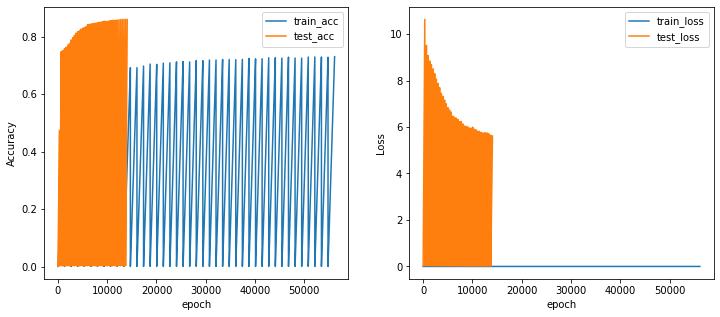

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(loss_dict["train_acc"], label="train_acc")
plt.plot(loss_dict["test_acc"], label="test_acc")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(loss_dict["train_loss"], label="train_loss")
plt.plot(loss_dict["test_loss"], label="test_loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
torch.save(deep_model.state_dict(), '/content/drive/MyDrive/Numble_Challenge/Numble_model.pt')